In [1]:
import os
os.chdir('../..')
from vis.visualization import visualize_saliency, overlay, visualize_activation
from vis.input_modifiers import Jitter
from vis.utils import utils
from keras import activations
from keras.models import load_model
from keras.applications import ResNet50
from matplotlib import pyplot as plt
%matplotlib inline


# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Build the ResNet50 network with ImageNet weights
# model = ResNet50(weights='imagenet', include_top=True)
# layer_idx = utils.find_layer_idx(model, 'fc1000')
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.

# model = load_model('trained/models/resnet50_lidar.h5')
model = load_model('trained/models/inceptionresnetv2_rgb.h5')
layer_idx = utils.find_layer_idx(model, 'rgb_predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [3]:

plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
filter_indices=5
img = visualize_activation(model, layer_idx, filter_indices=filter_indices)
plt.imshow(img)

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


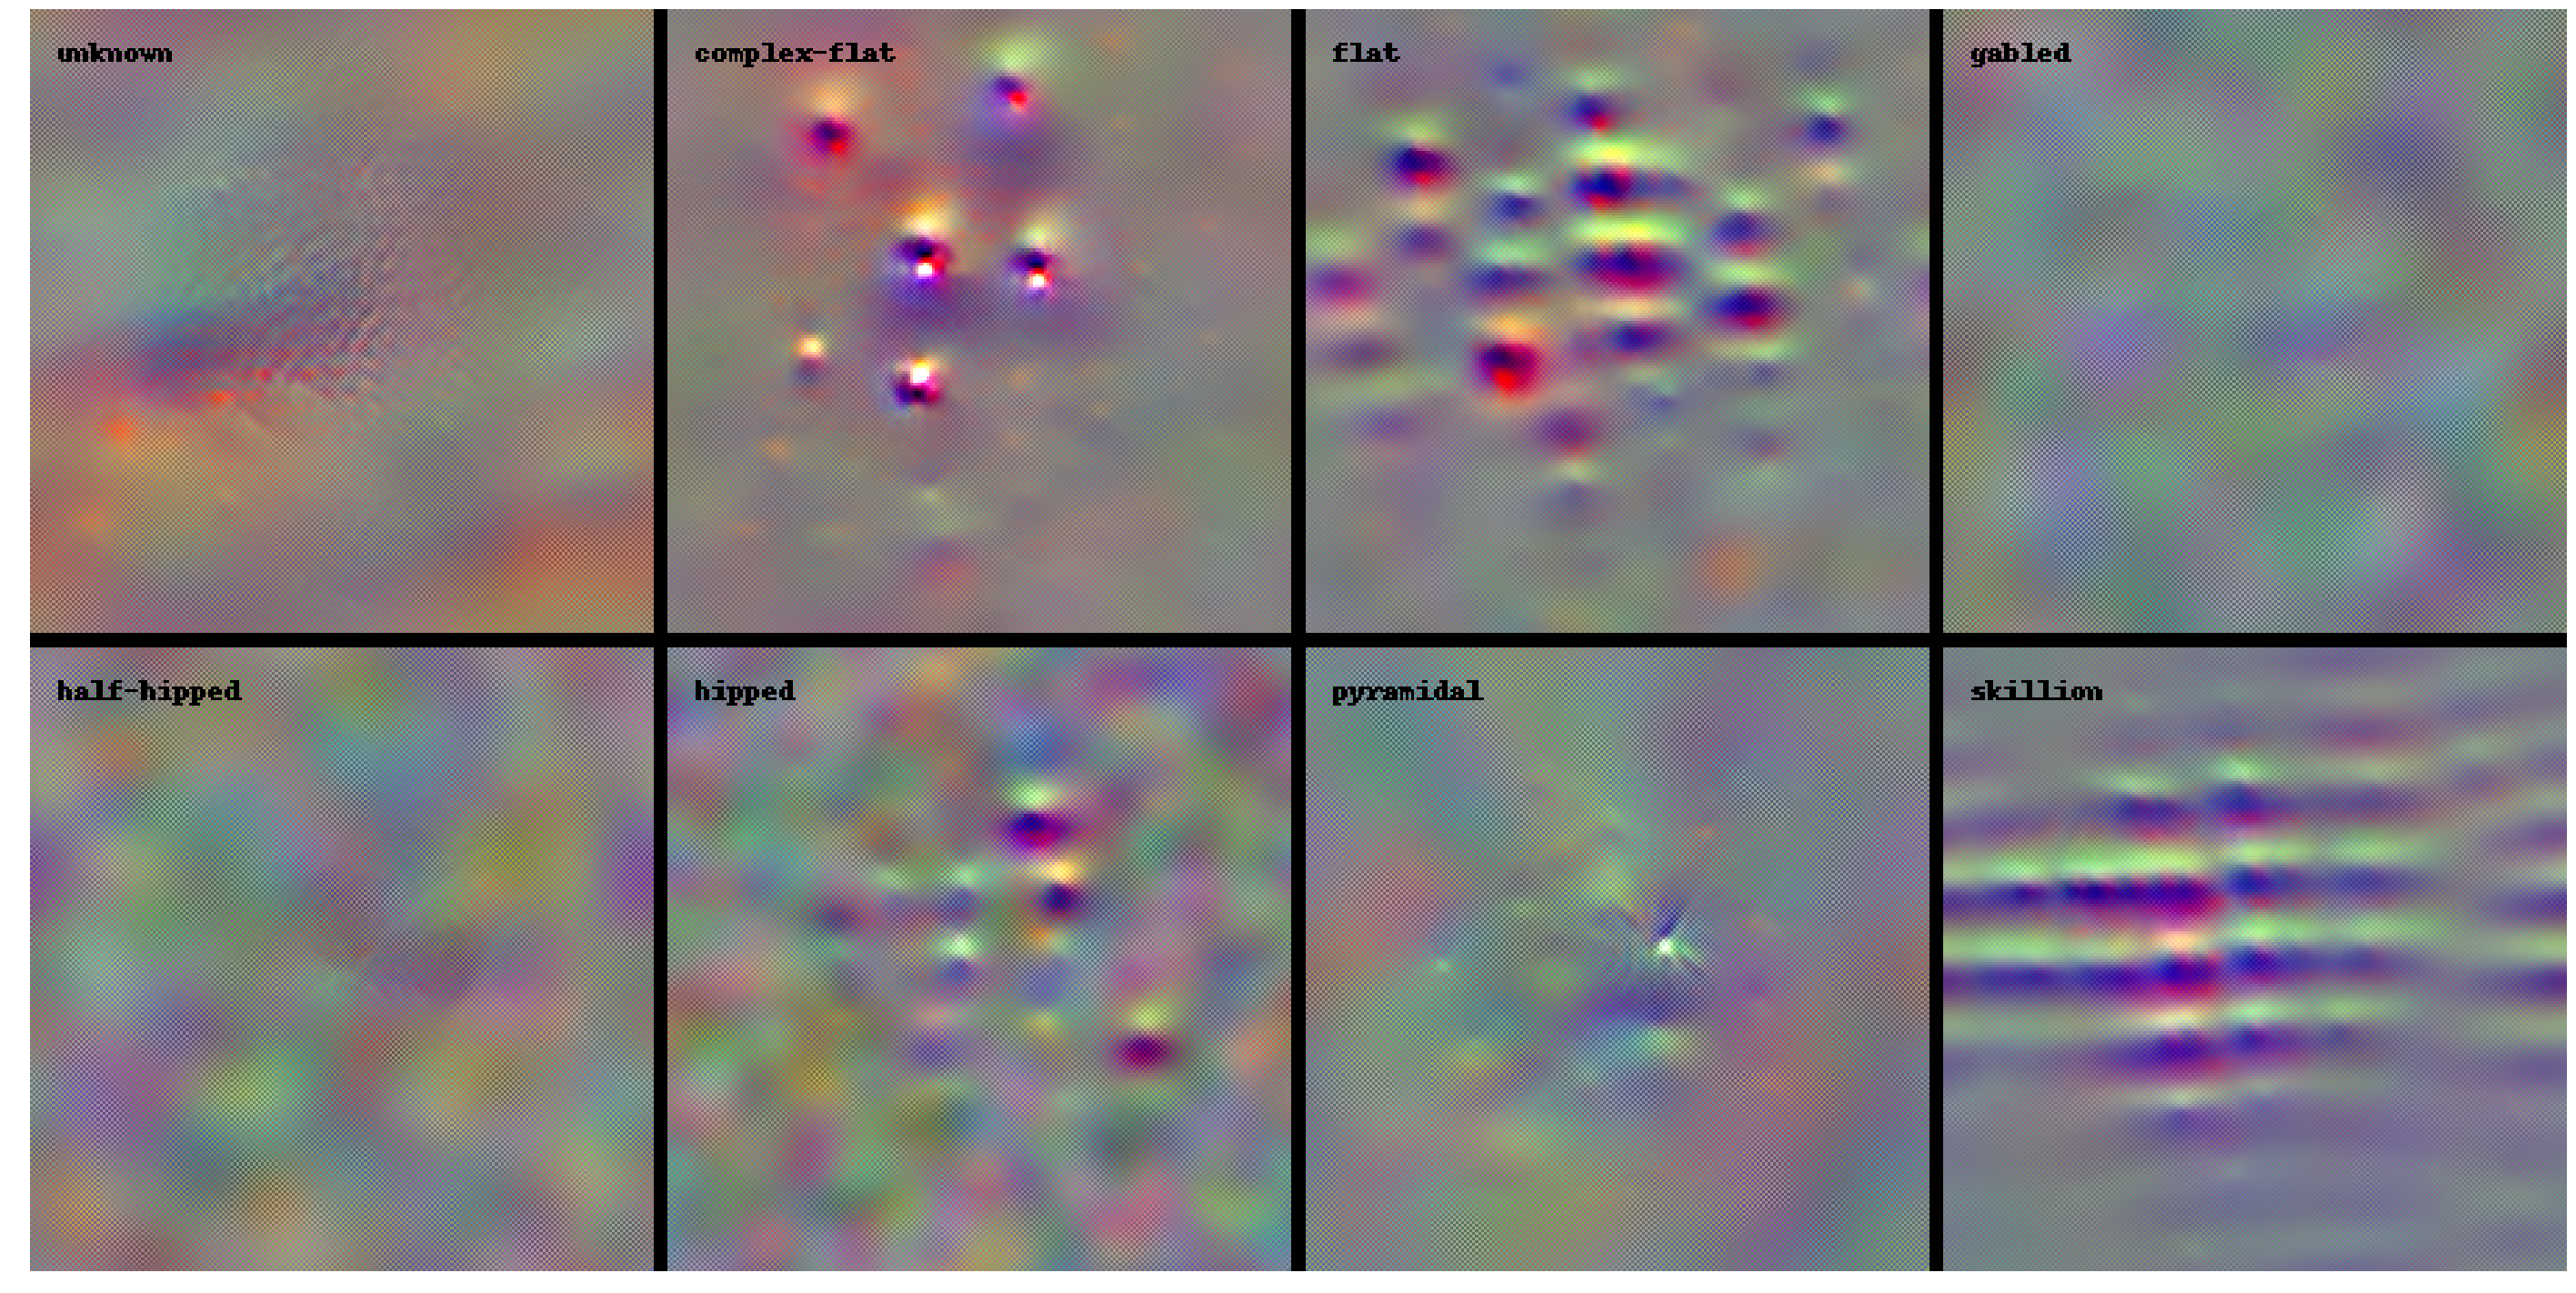

In [4]:
from vis.input_modifiers import Jitter
classes = {
        0: "unknown",
        1: "complex-flat",
        2: "flat",
        3: "gabled",
        4: "half-hipped",
        5: "hipped",
        6: "pyramidal",
        7: "skillion"
}
vis_images = []
image_modifiers = [Jitter(16)]
for idx in list(classes.keys()):    
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=500, input_modifiers=image_modifiers)
    
    # Reverse lookup index to imagenet label and overlay it on the image.
    img = utils.draw_text(img, classes[idx])
    vis_images.append(img)

# Generate stitched images with 5 cols (so it will have 3 rows).
plt.rcParams['figure.figsize'] = (50, 50)
stitched = utils.stitch_images(vis_images, cols=4)
plt.axis('off')
plt.imshow(stitched)
plt.show()